<a href="https://colab.research.google.com/github/manabil/Machine_Learning_Intermediate/blob/main/Image%20Classification/1-%20Create%20and%20Train%20Model%20for%20Dataset%20Real%20Image%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2022-08-30 05:05:24--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2022-08-30 05:05:24--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   359MB/s   

In [2]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Pawn', 'King', 'Knight', 'Bishop', 'Queen', 'Rook']

In [4]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


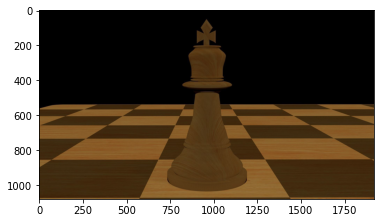

In [5]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
    
    
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [8]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [9]:
model.compile(optimizer=tf.optimizers.Adam(),
                loss='categorical_crossentropy',
                metrics = ['accuracy'])

In [10]:
history = model.fit(train_generator,
                                validation_data=validation_generator,
                                epochs=50,
                                verbose=2)

Epoch 1/50
63/63 - 23s - loss: 1.9343 - accuracy: 0.1904 - val_loss: 1.7898 - val_accuracy: 0.1923 - 23s/epoch - 359ms/step
Epoch 2/50
63/63 - 10s - loss: 1.7899 - accuracy: 0.1844 - val_loss: 1.7857 - val_accuracy: 0.1923 - 10s/epoch - 158ms/step
Epoch 3/50
63/63 - 10s - loss: 1.7949 - accuracy: 0.1844 - val_loss: 1.7841 - val_accuracy: 0.1731 - 10s/epoch - 156ms/step
Epoch 4/50
63/63 - 9s - loss: 1.7848 - accuracy: 0.1924 - val_loss: 1.7820 - val_accuracy: 0.1923 - 9s/epoch - 148ms/step
Epoch 5/50
63/63 - 9s - loss: 1.7790 - accuracy: 0.2004 - val_loss: 1.7770 - val_accuracy: 0.2308 - 9s/epoch - 147ms/step
Epoch 6/50
63/63 - 9s - loss: 1.7451 - accuracy: 0.2325 - val_loss: 1.7925 - val_accuracy: 0.2692 - 9s/epoch - 147ms/step
Epoch 7/50
63/63 - 9s - loss: 1.7191 - accuracy: 0.2806 - val_loss: 1.7346 - val_accuracy: 0.2692 - 9s/epoch - 148ms/step
Epoch 8/50
63/63 - 9s - loss: 1.6901 - accuracy: 0.2745 - val_loss: 1.8256 - val_accuracy: 0.3269 - 9s/epoch - 146ms/step
Epoch 9/50
63/63 -

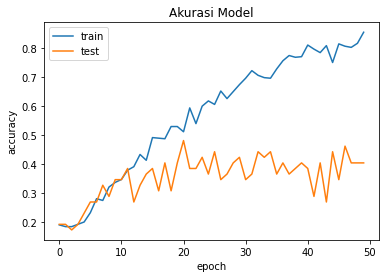

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

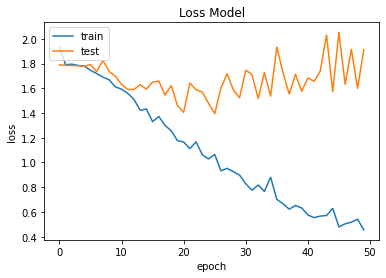

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()